Import the neccessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Data Loading

In [13]:
# We use the "train.csv" file as it contains the target variable "price_range"
# The "test.csv" file is typically used for final submission without the target
try:
    data = pd.read_csv("train.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'train.csv' was not found. Please ensure the file is in same directory")
    exit()

data

Data loaded successfully!


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


Data Preprocessing

In [14]:
# Check for missing values
data_missing = data.isnull().sum()
print("Missing Values")
print(data_missing)

Missing Values
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [15]:
# Check for duplicated rows
data_duplicated = data.duplicated().sum()
print("Duplicated Rows")
print(data_duplicated)

Duplicated Rows
0


Feature Engineering

In [16]:
# Define the feature matrix (X) and the target variable (y)
X = data.drop("price_range",axis=1)
y = data["price_range"]

Visualization before Training

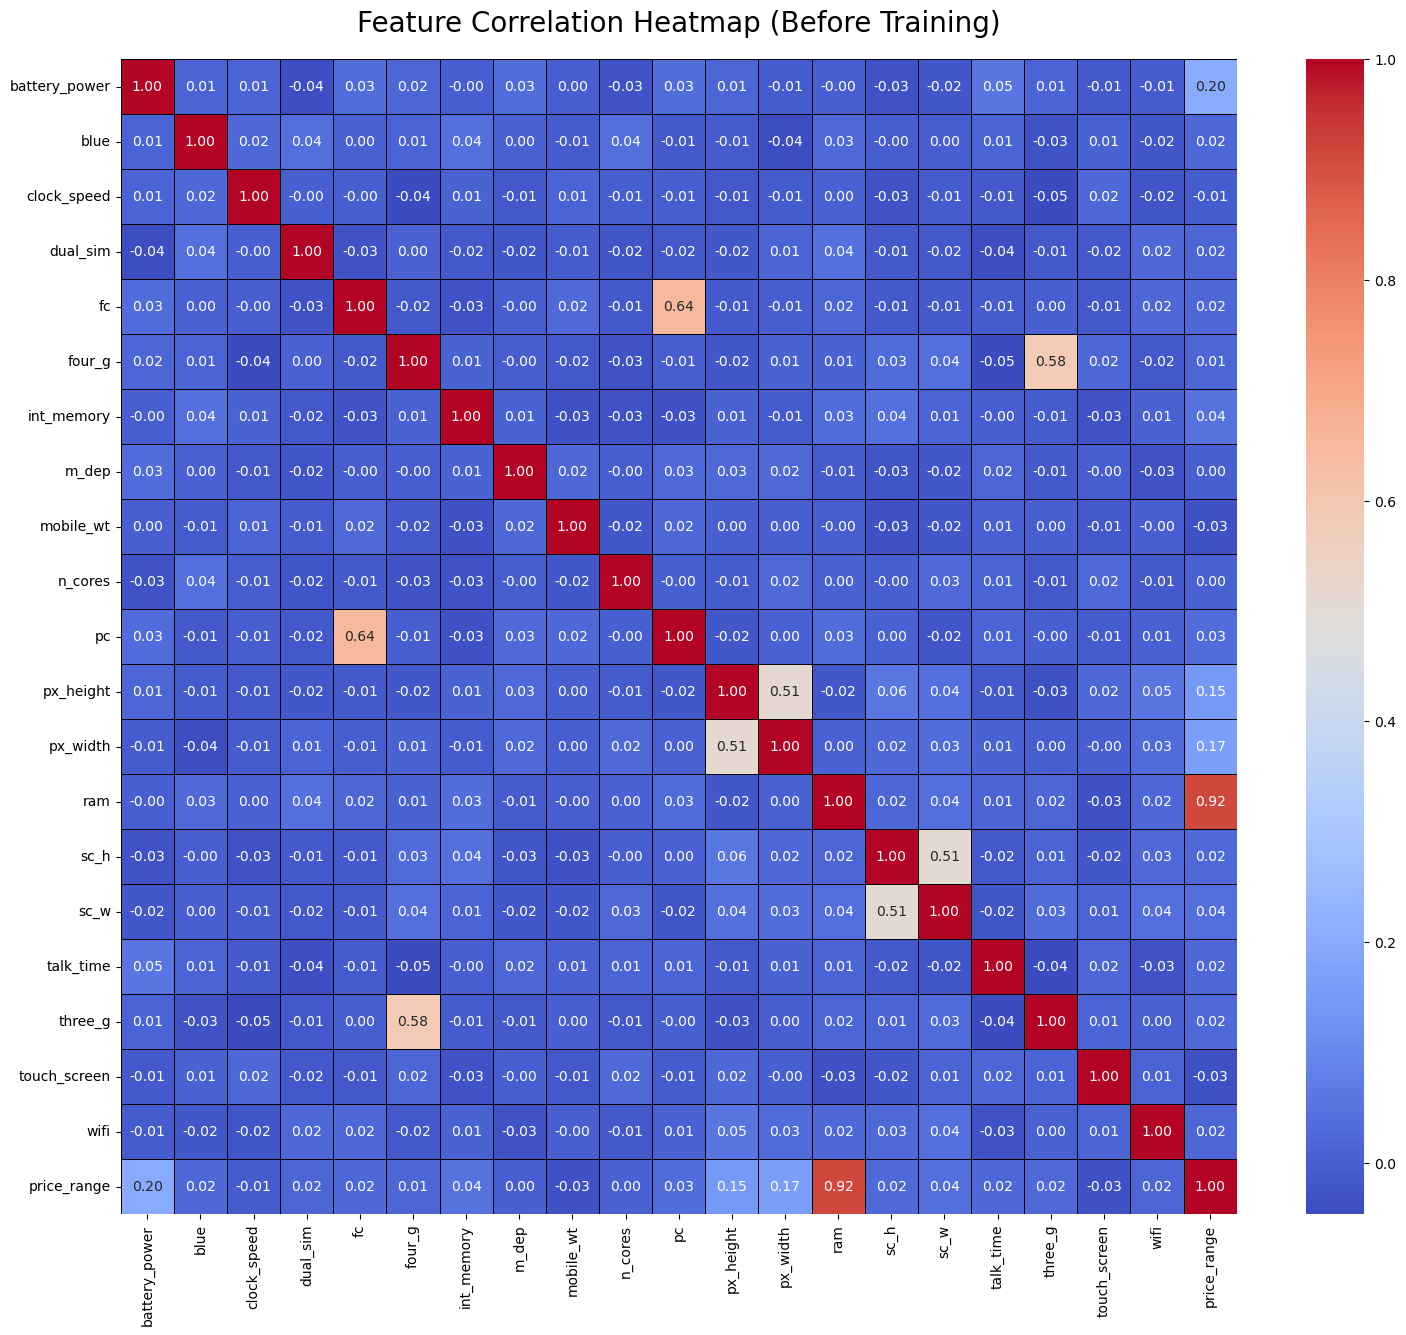

In [17]:
# Visualize the correlation matrix to understand feature realtionships
# and how features correlate with the target variable ("price_range")

plt.figure(figsize=(18,15))
# Calculate the correlation matrix for all column, including the target
correlation_matrix = data.corr()

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor="black"
)

plt.title("Feature Correlation Heatmap (Before Training)",fontsize=20,pad=20)
plt.show()

Data Splitting

In [18]:
# Split the data into training (80%) and testing (20%) sets
# random_state ensures reprodiucibilty of the split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1600 samples
Testing set size: 400 samples


Data Scaling

In [19]:
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Apply the transformation to both training and test data
X_test_scaled = scaler.transform(X_test)

Model Training and Comparison

In [23]:
# Define models to be compared
models ={
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
    "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "Support Vector Machine": SVC(random_state=42,kernel="linear")
}

accuracy_scores = {}

for name,model in models.items():
    # Train the model using the scaled training data
    # KNN,LR and SVS need scaled data. DT and RF are scaled-invariant, but
    # we use scaled data for consitency
    model.fit(X_train_scaled,y_train)

    # Make predictions on the scaled data
    y_pred = model.predict(X_test_scaled)

    # Calculate the model's aacuracy
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores[name] = accuracy

    # Print the result
    print(f"[{name}] Accuracy: {accuracy:.4f}")

# Find the best performing model
best_model_name = max(accuracy_scores,key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model_name]

print("-----Best Model Found-----")
print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

[Logistic Regression] Accuracy: 0.9750
[K-Nearest Neighbours] Accuracy: 0.5300
[Decision Tree] Accuracy: 0.8350
[Random Forest] Accuracy: 0.8925
[Support Vector Machine] Accuracy: 0.9700
-----Best Model Found-----
The best model is Logistic Regression with an accuracy of 0.9750


Visualization After Training

C:\Users\Dell\AppData\Local\Temp\ipykernel_13420\3468918187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


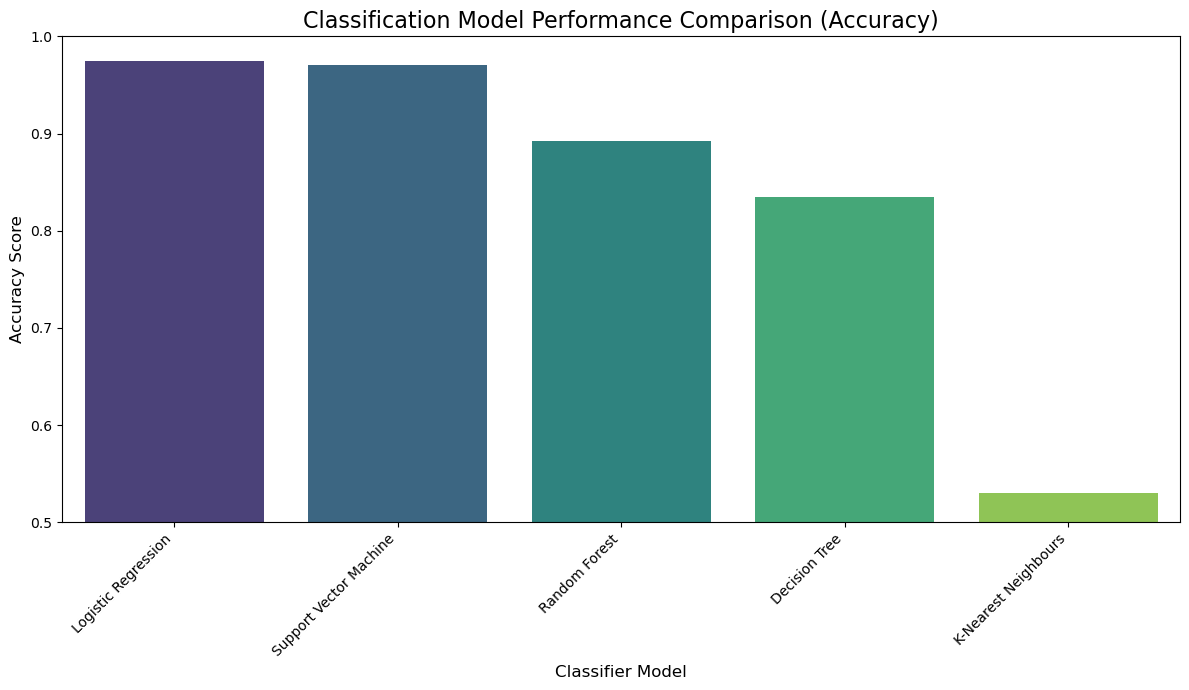

In [25]:
# Convert the dictionary of results into a pandas Seies for easy plotting
results = pd.Series(accuracy_scores).sort_values(ascending=False)

plt.figure(figsize=(12,7))
# Create a bar plot of the model accuracies
bars = sns.barplot(
    x=results.index,
    y=results.values,
    palette="viridis"
)

plt.ylim(0.5,1.0)
plt.title("Classification Model Performance Comparison (Accuracy)",fontsize=16)
plt.xlabel("Classifier Model",fontsize=12)
plt.ylabel("Accuracy Score",fontsize=12)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()